In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install tensorflow==2.8.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 59.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing instal

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.1


In [ ]:
!pip3 install -U segmentation-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
### Albumentations to version>=0.3.0 for `Lambda` transform support
!pip3 install -U albumentations>=0.3.0 --user

In [ ]:
import segmentation_models as sm
print(sm.__version__)

Segmentation Models: using `keras` framework.
1.0.1


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import cv2
import glob
import random
import numpy as np
from PIL import Image
from keras.utils.np_utils import normalize
import tensorflow as tf
import segmentation_models as sm
import albumentations as A

# to resolve AttributeError: module 'keras.utils' has no attribute 'get_file' using segmentation_models error
sm.set_framework('tf.keras')
sm.framework()

'tf.keras'

In [ ]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from logging import LogRecord
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.optimizers import Adam
# from model_binary import CNetSeg
from sklearn.model_selection import train_test_split
import albumentations as A
from tensorflow.keras.utils import Sequence
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import shutil
import pandas as pd
from datetime import datetime


# Load dataset



In [ ]:
main_path = '/content/drive/MyDrive/cell-data/'
image_path = main_path + 'my-data-547/image'
label_path = main_path + 'my-data-547/mask'

image_files = sorted(glob.glob(image_path + '/*.tif'))
label_files = sorted(glob.glob(label_path + '/*.tif'))

# First, split into train and a temporary set (val + test)
train_image_files, temp_image_files, train_label_files, temp_label_files = train_test_split(
    image_files, label_files, test_size=0.2, random_state=42)

# Now, split the temporary set into validation and test sets
val_image_files, test_image_files, val_label_files, test_label_files = train_test_split(
    temp_image_files, temp_label_files, test_size=0.5, random_state=42)




In [ ]:
print(f"Train size: {len(train_image_files)} ___ {len(train_label_files)}")
print(f"Valid size: {len(test_image_files)} ___ {len(test_label_files)}")
print(f"Test size: {len(val_image_files)} ___ {len(val_label_files)}")
print(f"Train shape: {train_image_files}")

Train size: 437 ___ 437
Valid size: 55 ___ 55
Test size: 55 ___ 55
Train shape: ['/content/drive/MyDrive/cell-data/my-data-547/image/img183.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img456.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img428.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img36.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img313.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img99.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img515.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img298.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img48.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img482.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img458.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img304.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img287.tif', '/content/drive/MyDrive/cell-data/my-data-547/image/img531.tif', '/content/dr




# Utility Function

In [ ]:
# helper function for data visualization
def visualize(image, mask):
  image_number = random.randint(0, len(im. age))
  plt.figure(figsize=(12, 6))
  plt.subplot(121)
  plt.imshow(np.reshape(image[image_number], (256, 256)), cmap='gray')
  plt.subplot(122)
  plt.imshow(np.reshape(mask[image_number], (256, 256)), cmap='gray')
  plt.show()

# helper function for data visualization
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

# Data sets


In [ ]:
class Dataset:

    CLASSES = ['background', 'cell']

    def __init__(
            self,
            images_dir,
            masks_dir,
            classes=None,
            augmentation=None,
            preprocessing=None,
    ):
        self.images_fps = images_dir
        self.masks_fps = masks_dir

        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]

        self.augmentation = augmentation
        self.preprocessing = preprocessing

    def __getitem__(self, i):

        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # image = np.expand_dims(image, axis = -1)
        mask = cv2.imread(self.masks_fps[i], 0)

        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')

        # add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)

        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        return image, mask

    def __len__(self):
        return len(self.images_fps)


# Data Loader

In [ ]:
class Dataloder(Sequence):

    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):

        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])

        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]

        return batch

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size

    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
dataset = Dataset(train_image_files, train_label_files, classes=['cell'])
image, mask = dataset[5]

print(image.shape, mask.shape)


(345, 382, 3) (345, 382, 1)


# Augmentations

In [ ]:
BACKBONE = 'efficientnetb5'
BATCH_SIZE = 4
LR = 0.0001
EPOCHS = 100
IMAGE_SIZE = 256
preprocess_input = sm.get_preprocessing(BACKBONE)
BASE_MODEL = 'Unet'

In [ ]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define augmentations
def get_training_augmentation():
    train_transform = [

        A.Resize(IMAGE_SIZE, IMAGE_SIZE),
        A.HorizontalFlip(p=0.5),
        A.ElasticTransform(p=.9, alpha=1, sigma=50, alpha_affine=50),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        A.PadIfNeeded(min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, always_apply=True, border_mode=0),
        A.RandomCrop(height=IMAGE_SIZE, width=IMAGE_SIZE, always_apply=True),

        A.IAAAdditiveGaussianNoise(p=0.2),
        A.IAAPerspective(p=0.5),

        A.OneOf(
            [
                A.HorizontalFlip(p=0.8),
                A.VerticalFlip(p=0.4),
            ],
            p=0.5,
        ),

        A.OneOf(
            [
                A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0, p=1, border_mode=0), # scale only
                A.ShiftScaleRotate(scale_limit=0, rotate_limit=30, shift_limit=0, p=1, border_mode=0), # rotate only
                A.ShiftScaleRotate(scale_limit=0, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0), # shift only
                A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=30, shift_limit=0.1, p=1, border_mode=0), # affine transform
            ],
            p=0.9,
        ),

        A.OneOf(
            [
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1),
                A.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        A.OneOf(
          [
              A.Perspective(p=1),
              A.GaussNoise(p=1),
              A.Sharpen(p=1),
              A.Blur(blur_limit=3, p=1),
              A.MotionBlur(blur_limit=3, p=1),
          ],
          p=0.2,
        ),

        A.OneOf(
            [
                A.CLAHE(p=1),
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1),
                A.RandomGamma(p=1),
                A.HueSaturationValue(p=1),
            ],
            p=0.2,
        ),

        # A.OneOf(
        #     [
        #         A.IAASharpen(p=1),
        #         A.Blur(blur_limit=3, p=1),
        #         A.MotionBlur(blur_limit=3, p=1),
        #     ],
        #     p=0.9,
        # ),
        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform, p=0.9)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        A.PadIfNeeded(min_height=IMAGE_SIZE, min_width=IMAGE_SIZE, always_apply=True, border_mode=0),
        A.Resize(IMAGE_SIZE, IMAGE_SIZE),

    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform

    Args:
        preprocessing_fn (callbale): data normalization function
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose

    """

    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

In [ ]:
# define network parameters
n_classes = 1 # case for binary segmentation
activation = 'sigmoid'

#create model
model = sm.Unet(BACKBONE, classes=n_classes, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), activation=activation, encoder_weights="imagenet")

115523584/115515256 [==============================] - 1s 0us/step


In [ ]:
# define optomizer
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([1, 2, 0.5]))
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.48566 to fit



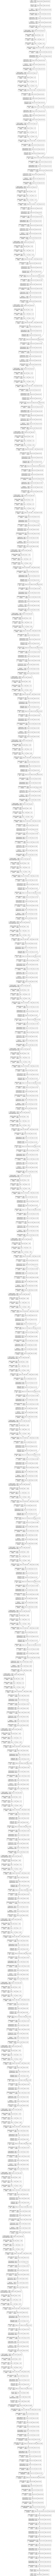

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
colab_path = '/content/drive/My Drive/Colab Notebooks/'

model_name = BASE_MODEL + '_' + BACKBONE + '_' + datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(model_name)
PATH = colab_path + model_name + "/"

Unet_efficientnetb5_2023-11-22_03-06-20


In [ ]:
PATH

'/content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20/'

In [ ]:
# Dataset for train images
train_dataset = Dataset(
    train_image_files,
    train_label_files,
    classes=['cell'],
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

# Dataset for validation images
valid_dataset = Dataset(
    val_image_files,
    val_label_files,
    classes=['cell'],
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)

# define callbacks for learning rate scheduling and best checkpoints saving
callbacks = [
    keras.callbacks.ModelCheckpoint(PATH +'best_model.h5', save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001),
]

/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.10/dist-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)


In [ ]:
# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 48  1296        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 128, 128, 48  192         ['stem_conv[0][0]']              
                                )                                                             

In [ ]:
EPOCH = 100

# train model
history = model.fit_generator(
   train_dataloader,
   steps_per_epoch=len(train_dataloader),
   epochs=EPOCH,
  #  callbacks=callbacks,
   validation_data=valid_dataloader,
   validation_steps=len(valid_dataloader),
)

In [ ]:
filename = f"{model_name}-{EPOCH}Ep.h5"
file_path = os.path.join(PATH, filename)
model.save(file_path)
print("Stored at " + PATH + filename)

Stored at /content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20/Unet_efficientnetb5_2023-11-22_03-06-20-100Ep.h5


In [ ]:
PATH

'/content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20/'

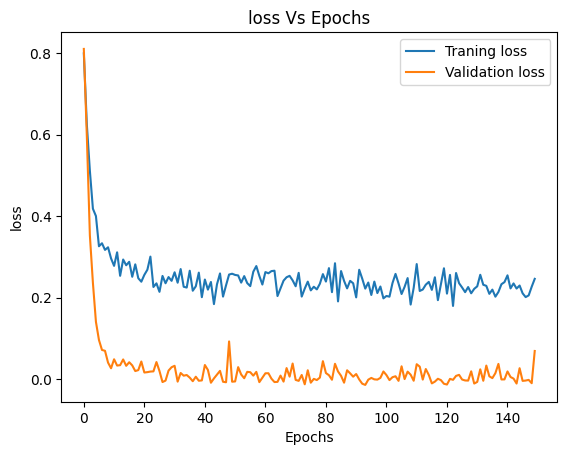

In [ ]:
def plot_graph(history,value):
  # get the data stored in history by value and plot it
  plt.plot(history.history[value],label="Traning "+value)
  plt.plot(history.history['val_'+value],label="Validation "+value)
  # `legend` is an area describing the elements of the graph
  plt.legend()
  # x axis label
  plt.xlabel('Epochs')
  # y axis label
  plt.ylabel(value)
  plt.title(value + " Vs Epochs")
  plt.show()

plot_graph(history,'loss')


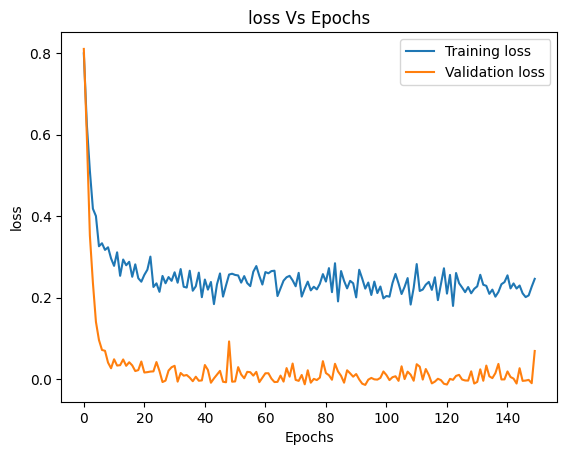

'/content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20/loss_plot.png'

In [ ]:

def save_plot_as_image(history, value, save_path):
    # Plot the training data for the specified value (e.g., 'loss' or 'accuracy')
    plt.plot(history.history[value], label="Training " + value)

    # Plot the validation data for the specified value with a legend
    plt.plot(history.history['val_' + value], label="Validation " + value)

    # Add a legend to the graph to distinguish between training and validation data
    plt.legend()

    # Set labels for the X and Y axes
    plt.xlabel('Epochs')
    plt.ylabel(value)

    # Set a title for the graph
    plt.title(value + " Vs Epochs")

    # Save the plot as an image at the specified save_path
    plt.savefig(save_path)

    # Display the plot (optional)
    plt.show()

path_for_save = PATH + 'loss_plot.png'

# Example usage: plotting and saving the training and validation loss as an image

save_plot_as_image(history, 'loss', path_for_save)
path_for_save




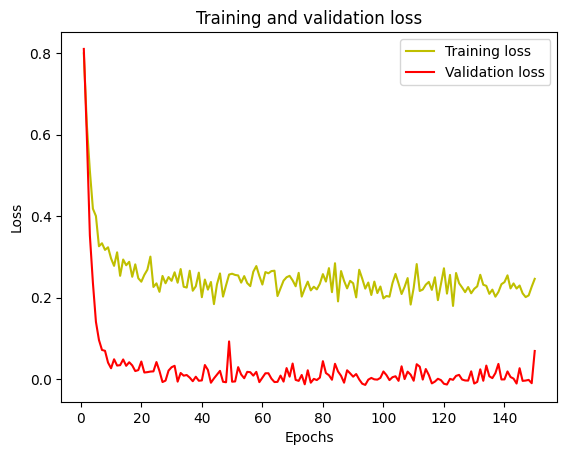

In [ ]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

# Model Evaluation

In [ ]:
file_path

'/content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20/Unet_efficientnetb5_2023-11-22_03-06-20-100Ep.h5'

In [ ]:
filename = f"{model_name}-{EPOCH}Ep.h5"
file_path = os.path.join(PATH, filename)
model.save(file_path)
print("Stored at " + PATH + "/" + filename)

Stored at /content/drive/My Drive/Colab Notebooks/Unet_efficientnetb5_2023-11-22_03-06-20//Unet_efficientnetb5_2023-11-22_03-06-20-100Ep.h5


In [ ]:
destination_path_test_image_files = PATH + 'Predic-Results/test_image_files'  # You can change the filename as needed
if not os.path.exists(destination_path_test_image_files): os.makedirs(destination_path_test_image_files)

destination_path_test_label_files = PATH + 'Predic-Results/test_label_files'  # You can change the filename as needed
if not os.path.exists(destination_path_test_label_files): os.makedirs(destination_path_test_label_files)


# Iterate through the list of source files and copy each one to the destination folder
for source_file in test_image_files:
    # Extract the file name from the source path
    file_name = source_file.split("/")[-1]

    # Construct the destination path by combining the destination folder and the file name
    destination_path = f"{destination_path_test_image_files}/{file_name}"

    # Copy the file to the destination folder
    shutil.copy(source_file, destination_path)

# Iterate through the list of source files and copy each one to the destination folder
for source_file in test_label_files:
    # Extract the file name from the source path
    file_name = source_file.split("/")[-1]

    # Construct the destination path by combining the destination folder and the file name
    destination_path = f"{destination_path_test_label_files}/{file_name}"

    # Copy the file to the destination folder
    shutil.copy(source_file, destination_path)


In [ ]:
test_image_files

['/content/drive/MyDrive/cell-data/my-data-547/image/img160.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img104.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img485.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img85.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img305.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img322.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img162.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img516.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img217.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img472.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img87.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img156.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img258.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img452.tif',
 '/content/drive/MyDrive/cell-data/my-data-547/image/img577.tif',
 '/content/d

In [ ]:
test_dataset = Dataset(
    test_image_files,
    test_label_files,
    classes=['cell'],
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)

In [ ]:
metrics

In [ ]:
scores = model.evaluate_generator(test_dataloader)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.__name__, value))

evaluated_metric = metrics

In [ ]:
print(metrics)

[<segmentation_models.metrics.IOUScore object at 0x7991b3ff9f30>, <segmentation_models.metrics.FScore object at 0x7991b3ffb0a0>]


In [ ]:

df = pd.DataFrame([metrics])
save_dir_pred = PATH + 'Predic-Results/'

# Save the DataFrame to a CSV file
df.to_csv(os.path.join(save_dir_pred, 'Evaluated.csv'), index=False)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

# helper function for data visualization
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x

# Visualization of results on test dataset


(1, 256, 256, 3)
(256, 256, 1)


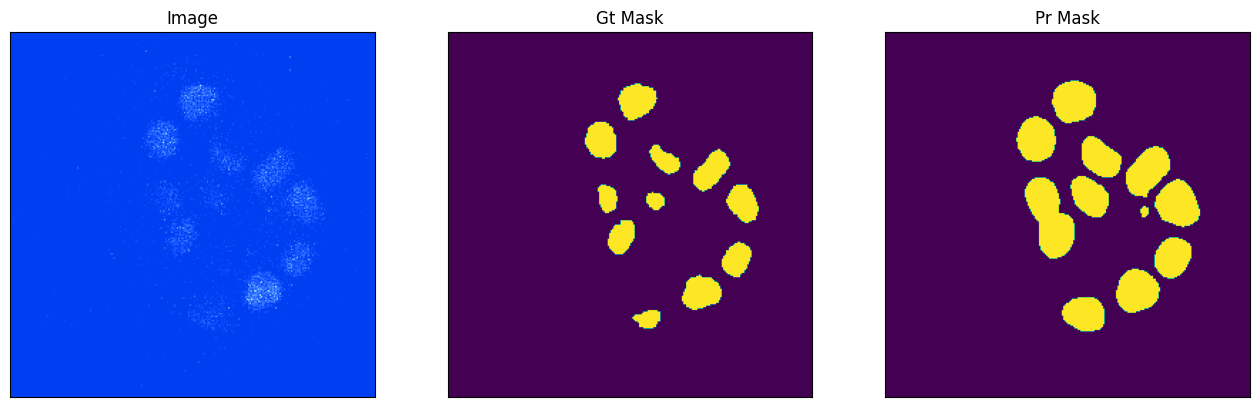

(1, 256, 256, 3)
(256, 256, 1)


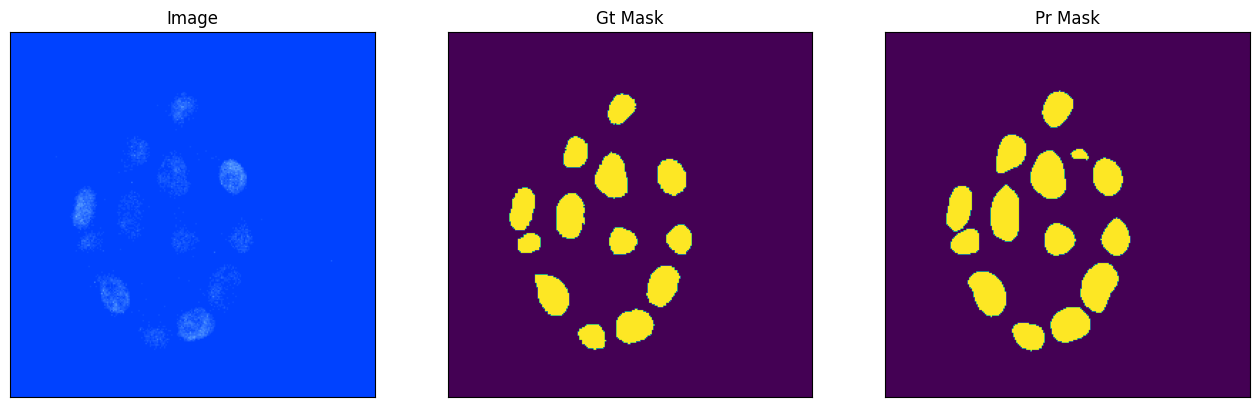

(1, 256, 256, 3)
(256, 256, 1)


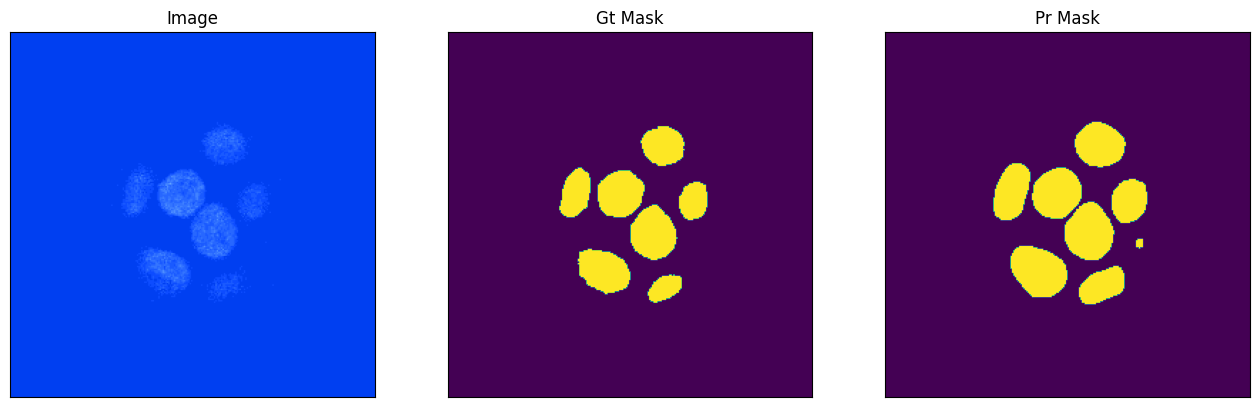

(1, 256, 256, 3)
(256, 256, 1)


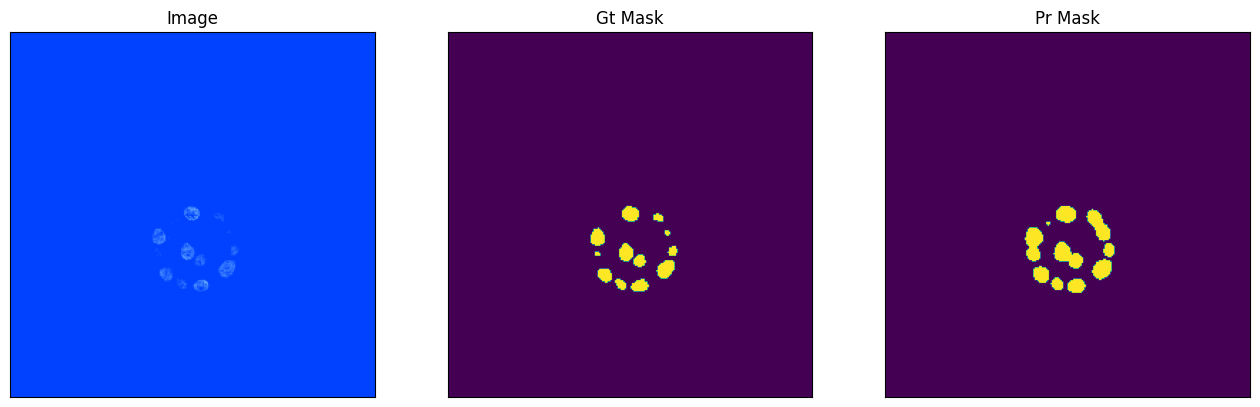

(1, 256, 256, 3)
(256, 256, 1)


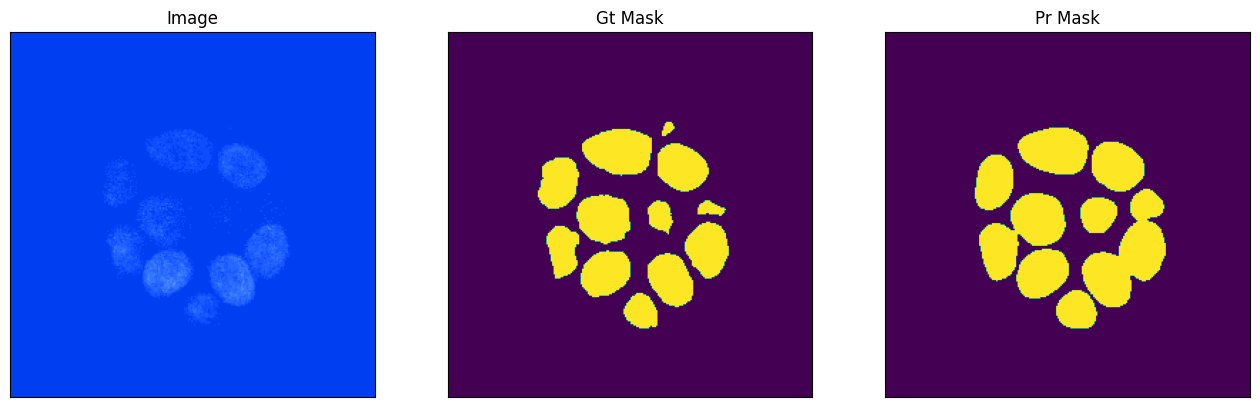

(1, 256, 256, 3)
(256, 256, 1)


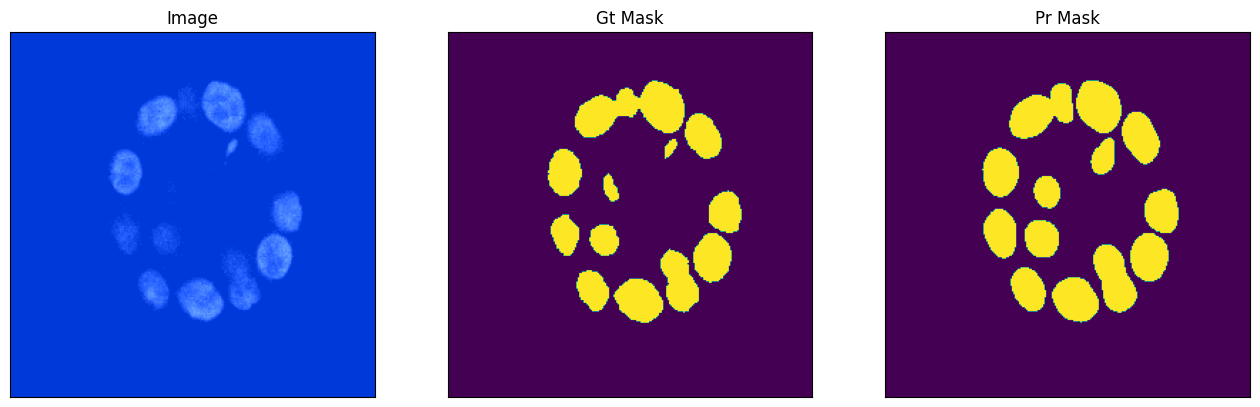

(1, 256, 256, 3)
(256, 256, 1)


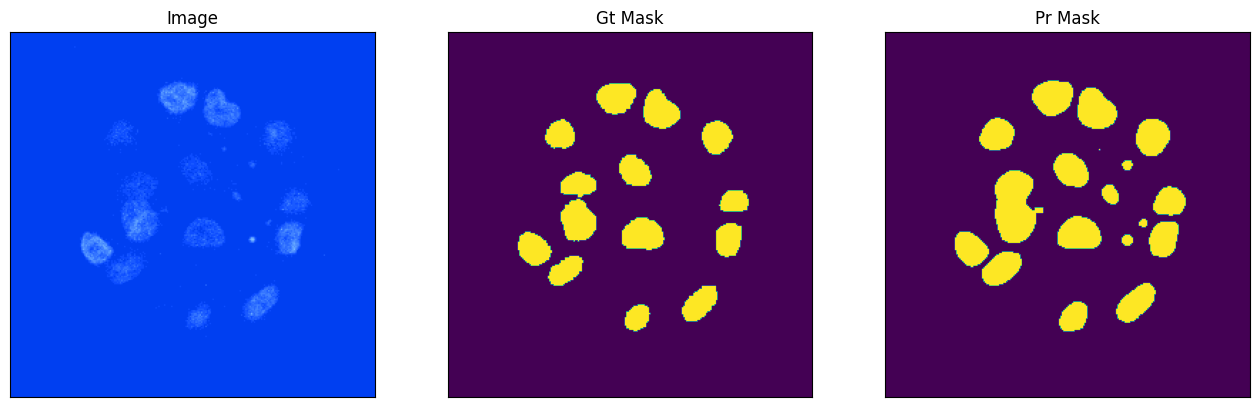

(1, 256, 256, 3)
(256, 256, 1)


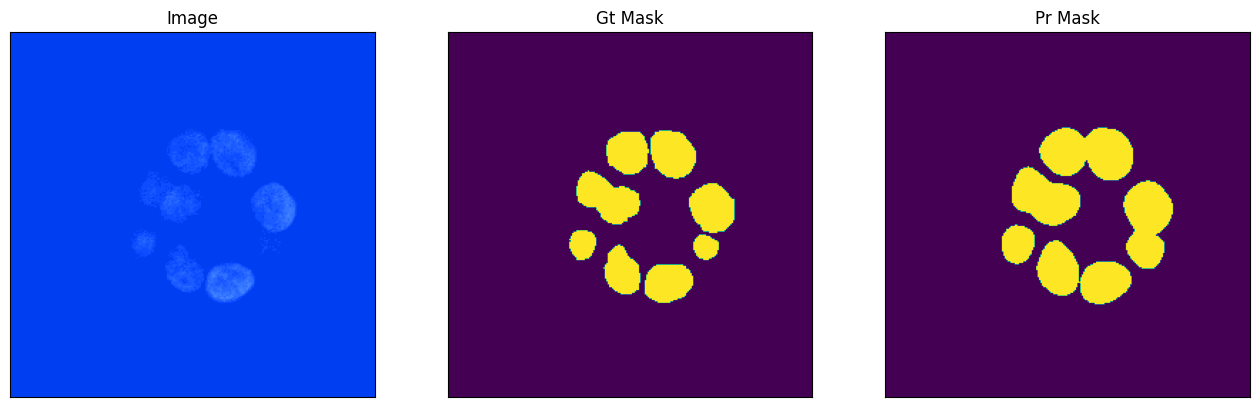

(1, 256, 256, 3)
(256, 256, 1)


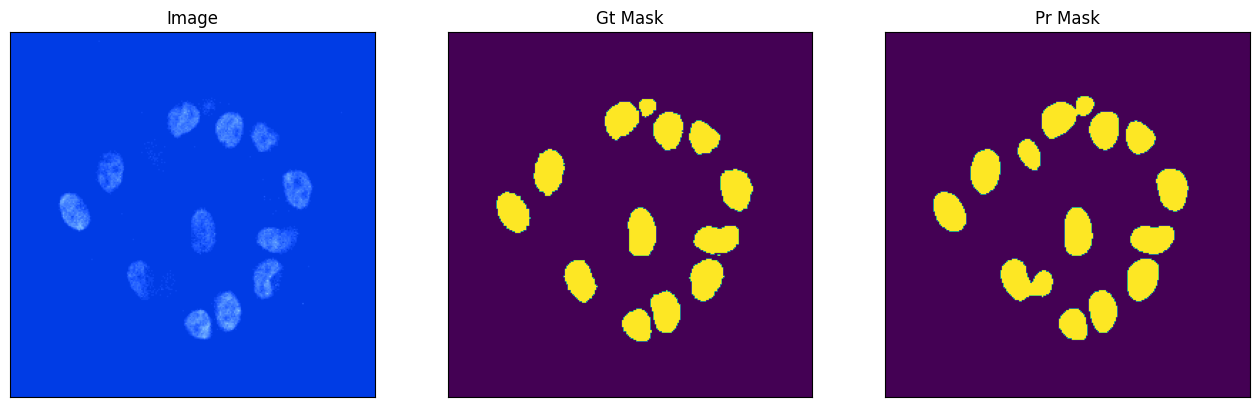

(1, 256, 256, 3)
(256, 256, 1)


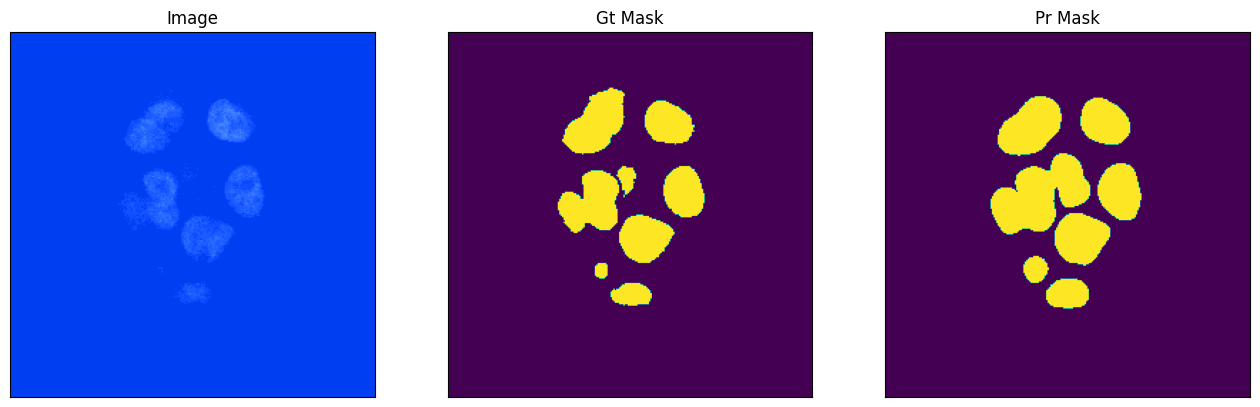

(1, 256, 256, 3)
(256, 256, 1)


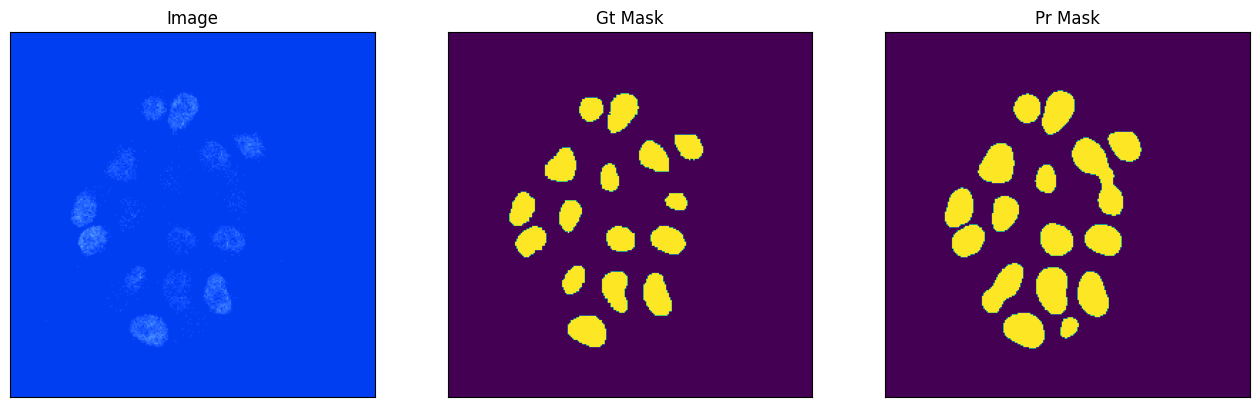

(1, 256, 256, 3)
(256, 256, 1)


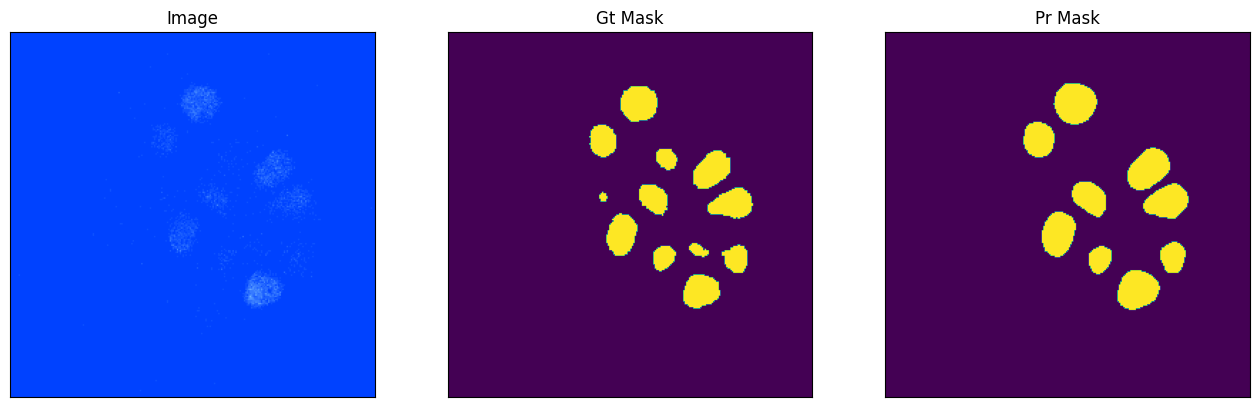

(1, 256, 256, 3)
(256, 256, 1)


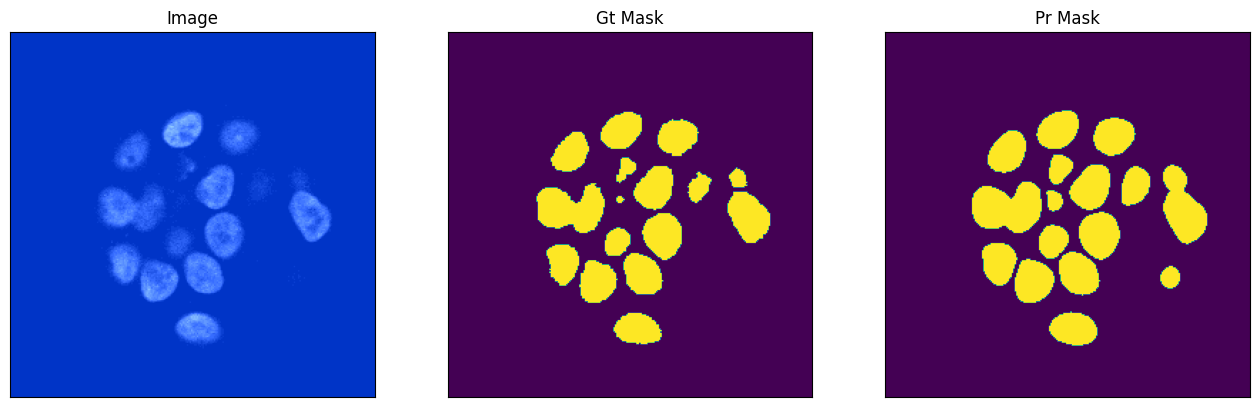

(1, 256, 256, 3)
(256, 256, 1)


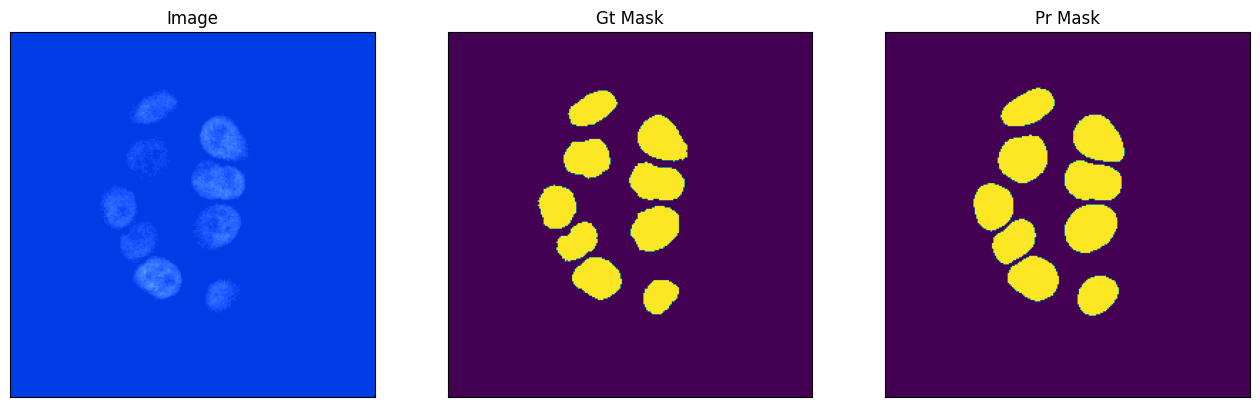

(1, 256, 256, 3)
(256, 256, 1)


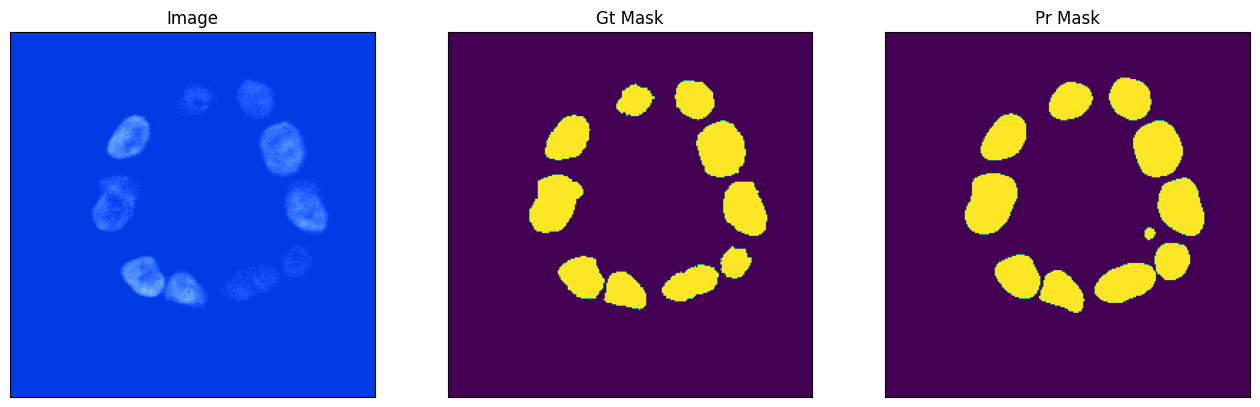

(1, 256, 256, 3)
(256, 256, 1)


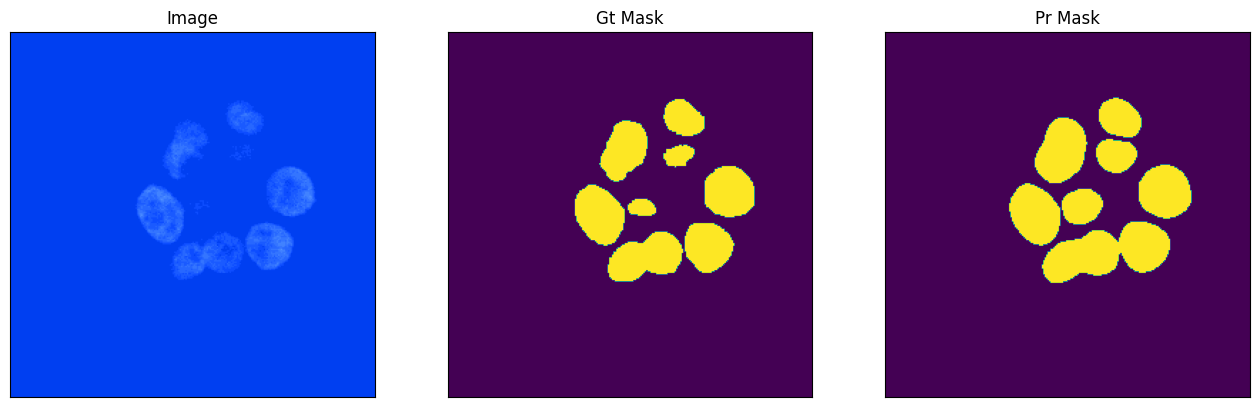

(1, 256, 256, 3)
(256, 256, 1)


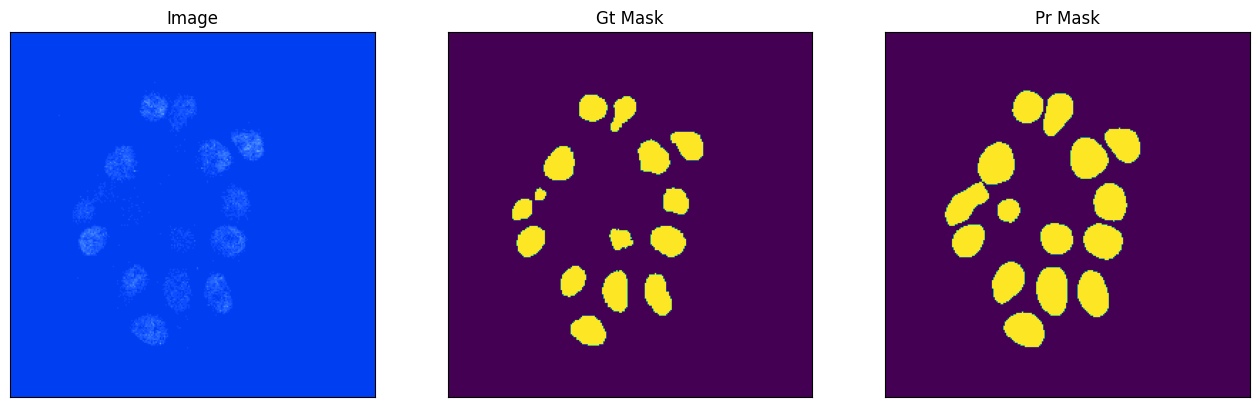

(1, 256, 256, 3)
(256, 256, 1)


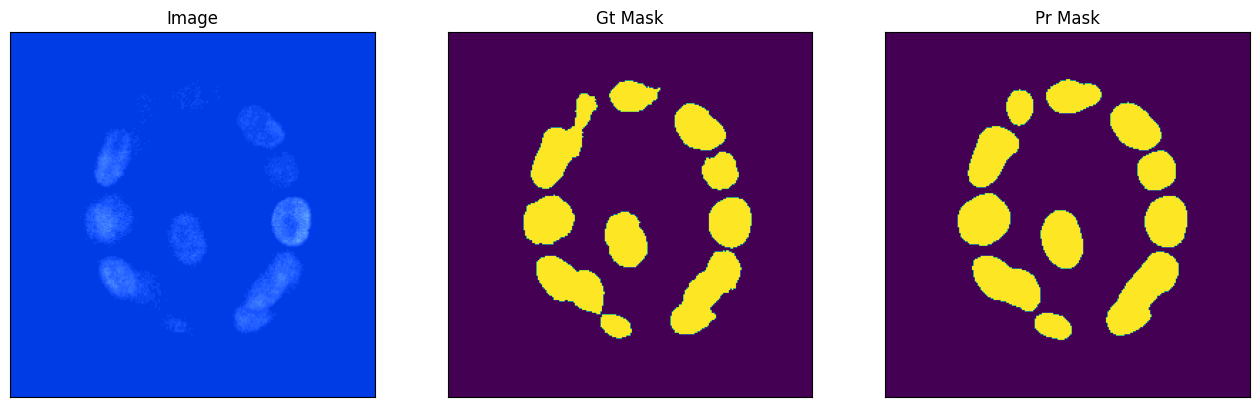

(1, 256, 256, 3)
(256, 256, 1)


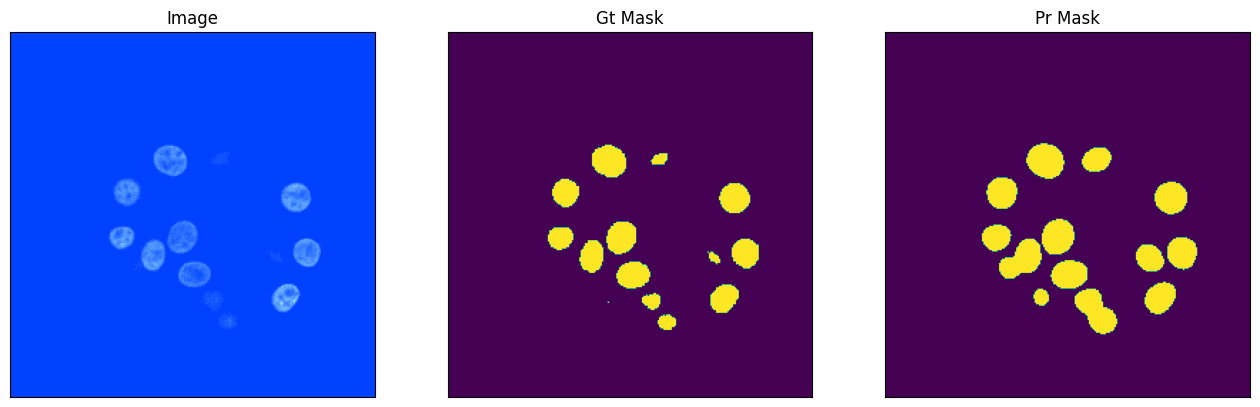

(1, 256, 256, 3)
(256, 256, 1)


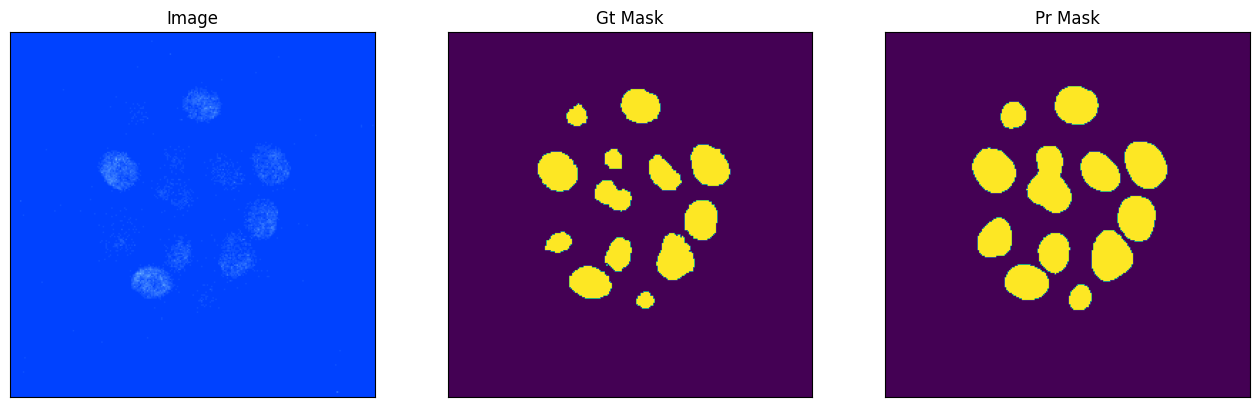

(1, 256, 256, 3)
(256, 256, 1)


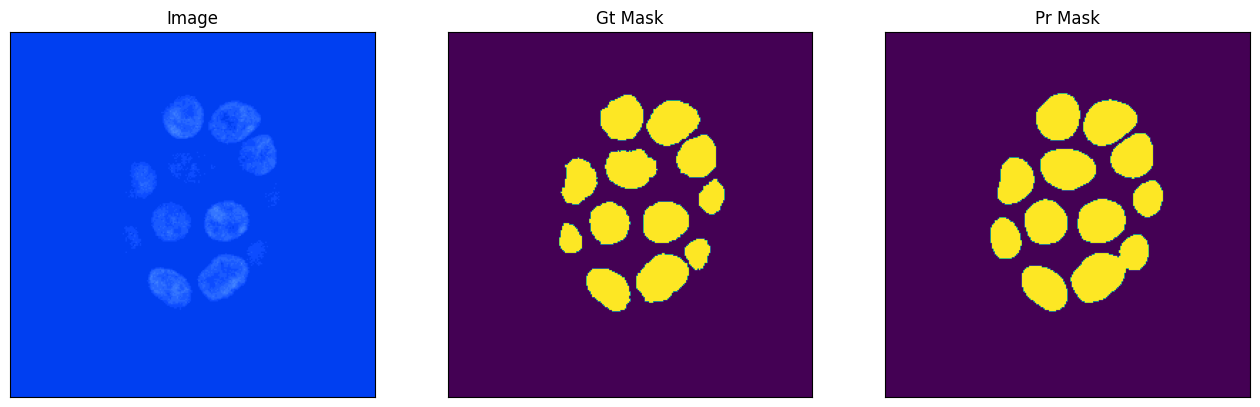

(1, 256, 256, 3)
(256, 256, 1)


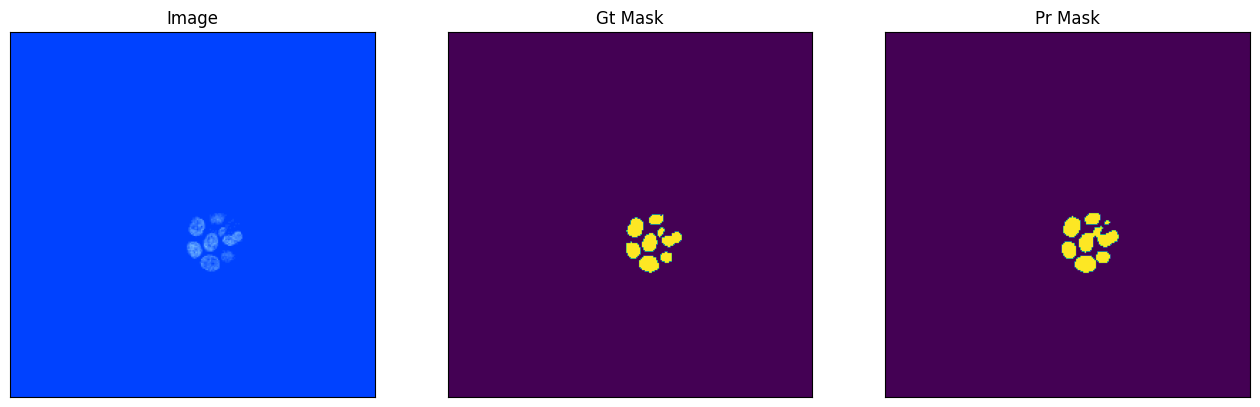

(1, 256, 256, 3)
(256, 256, 1)


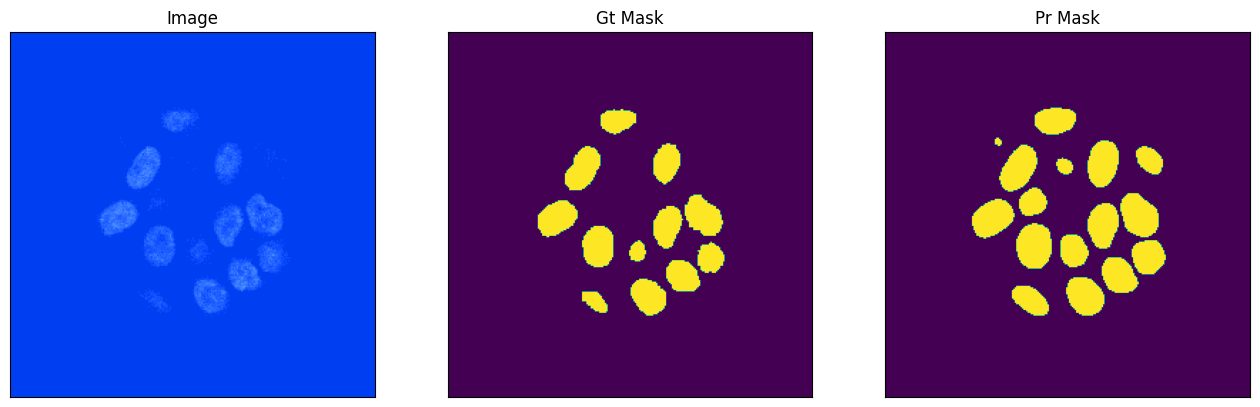

(1, 256, 256, 3)
(256, 256, 1)


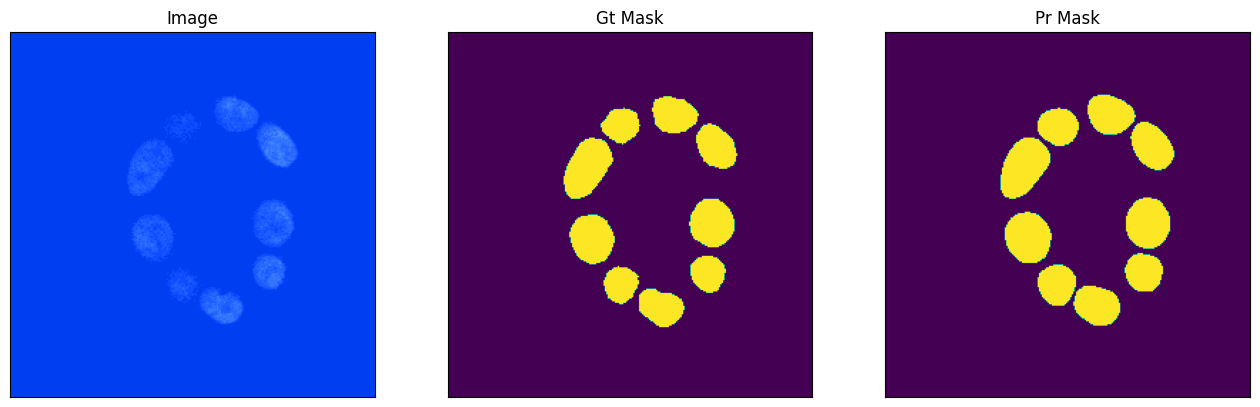

(1, 256, 256, 3)
(256, 256, 1)


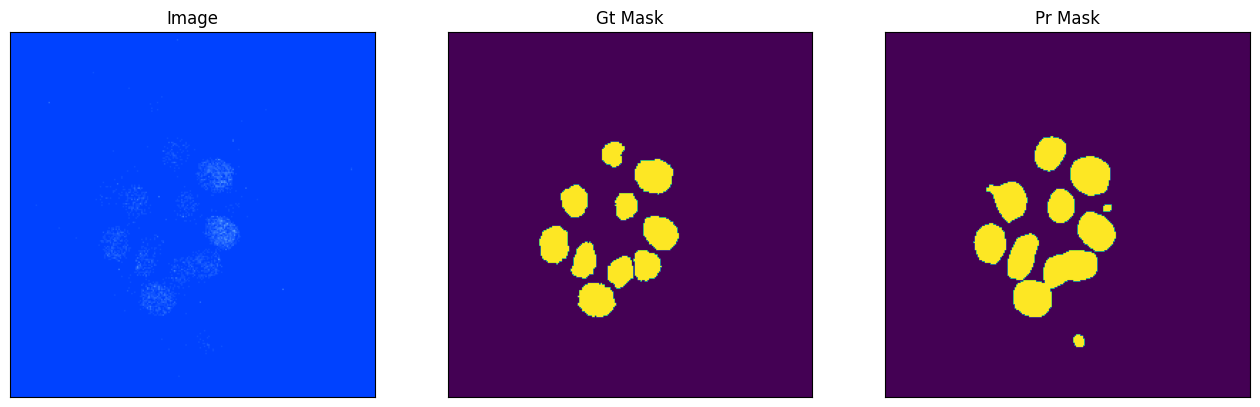

(1, 256, 256, 3)
(256, 256, 1)


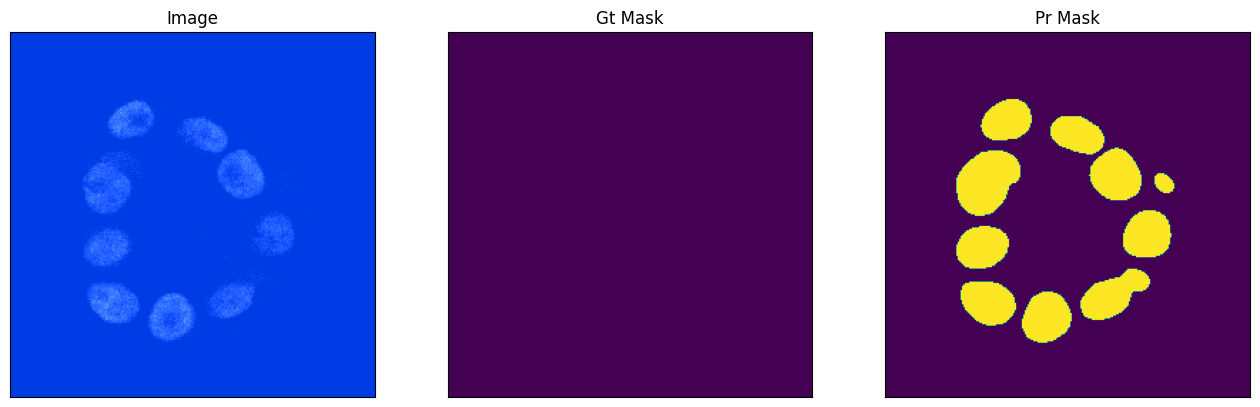

(1, 256, 256, 3)
(256, 256, 1)


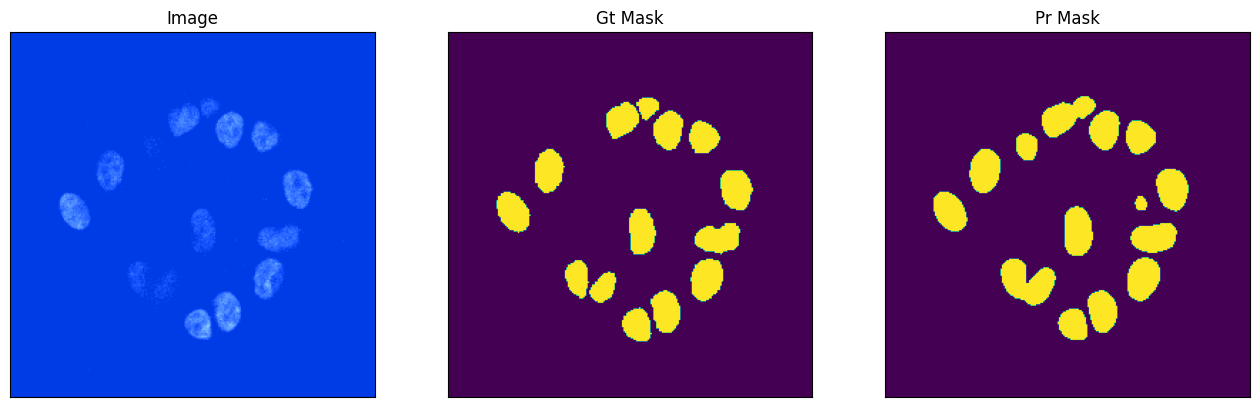

(1, 256, 256, 3)
(256, 256, 1)


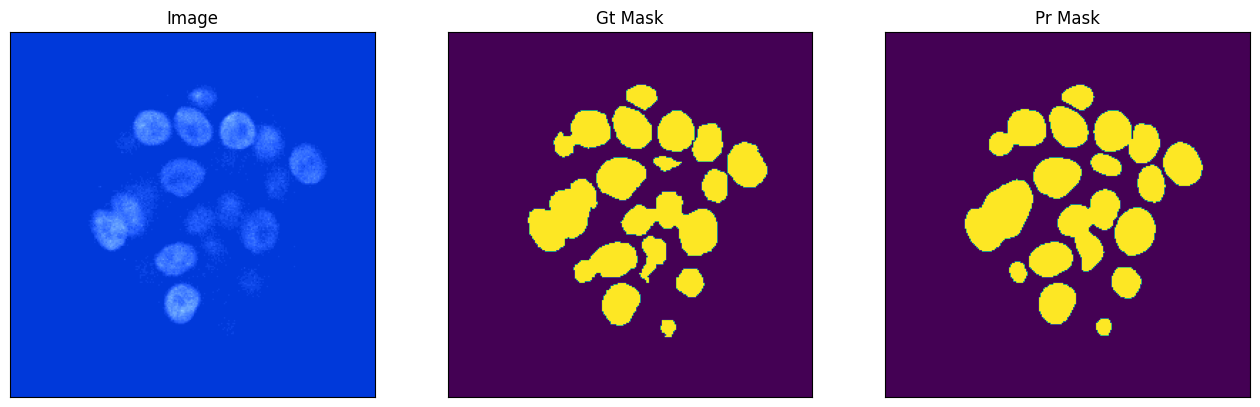

(1, 256, 256, 3)
(256, 256, 1)


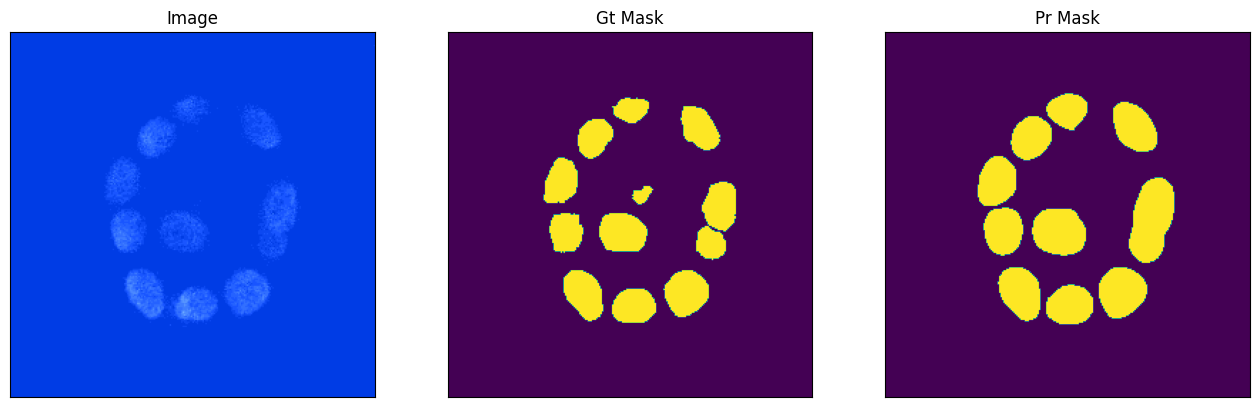

(1, 256, 256, 3)
(256, 256, 1)


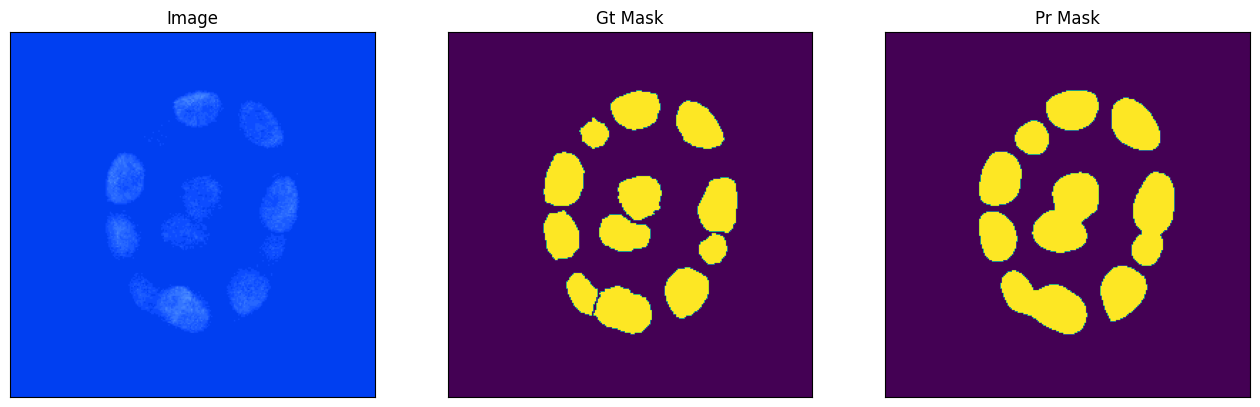

(1, 256, 256, 3)
(256, 256, 1)


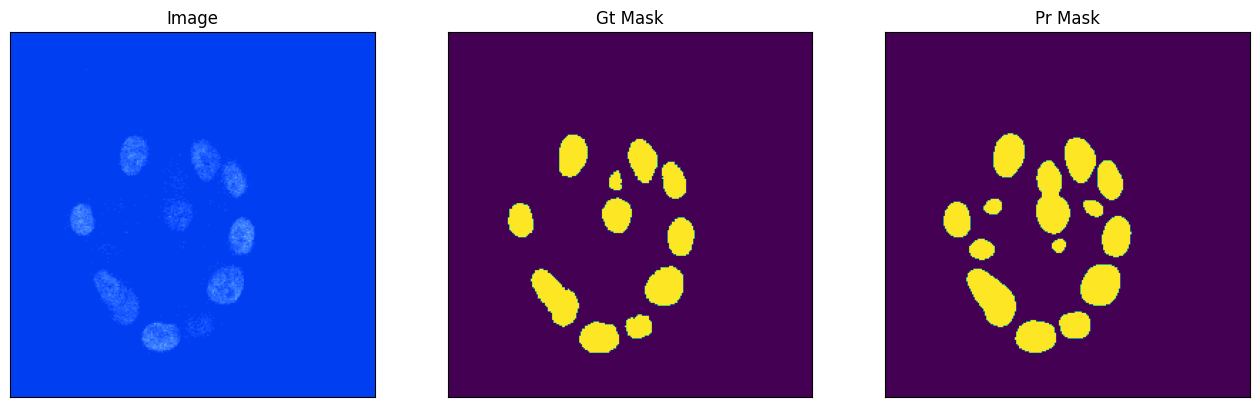

(1, 256, 256, 3)
(256, 256, 1)


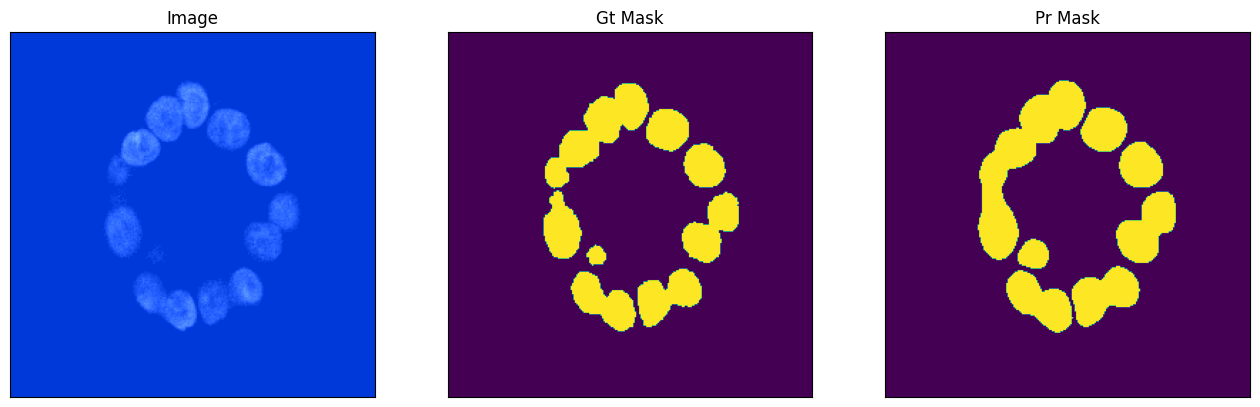

(1, 256, 256, 3)
(256, 256, 1)


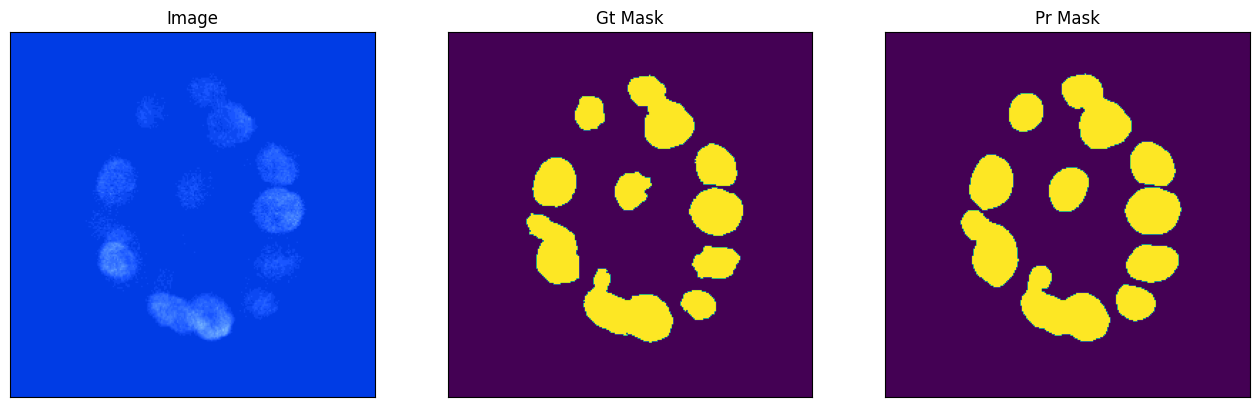

(1, 256, 256, 3)
(256, 256, 1)


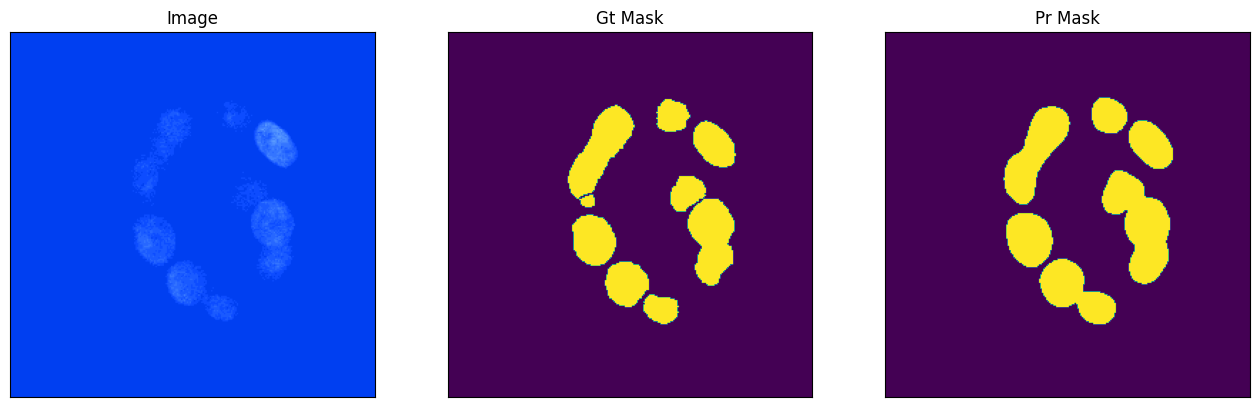

(1, 256, 256, 3)
(256, 256, 1)


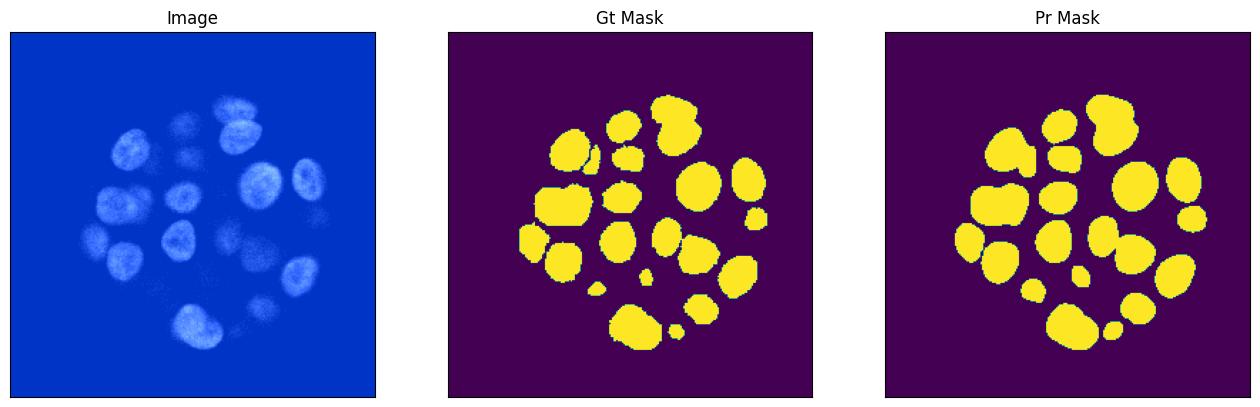

(1, 256, 256, 3)
(256, 256, 1)


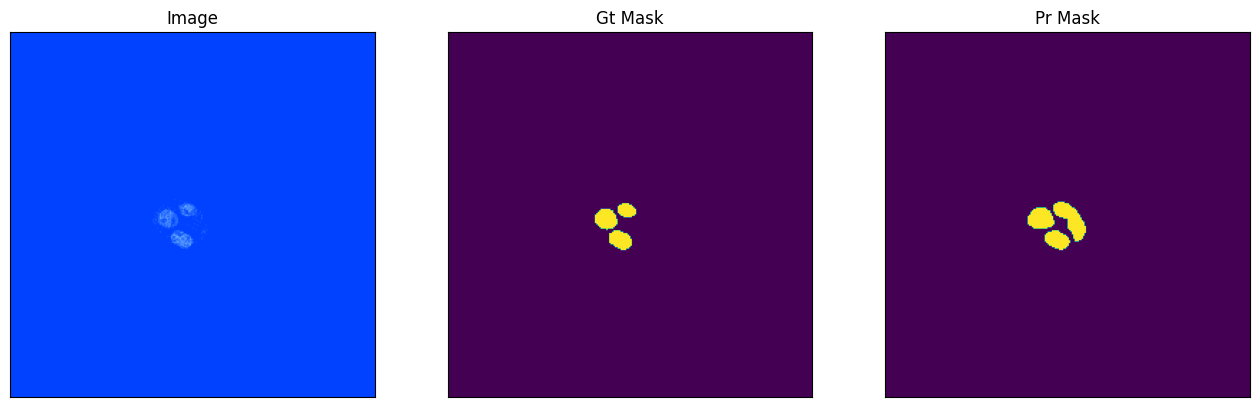

(1, 256, 256, 3)
(256, 256, 1)


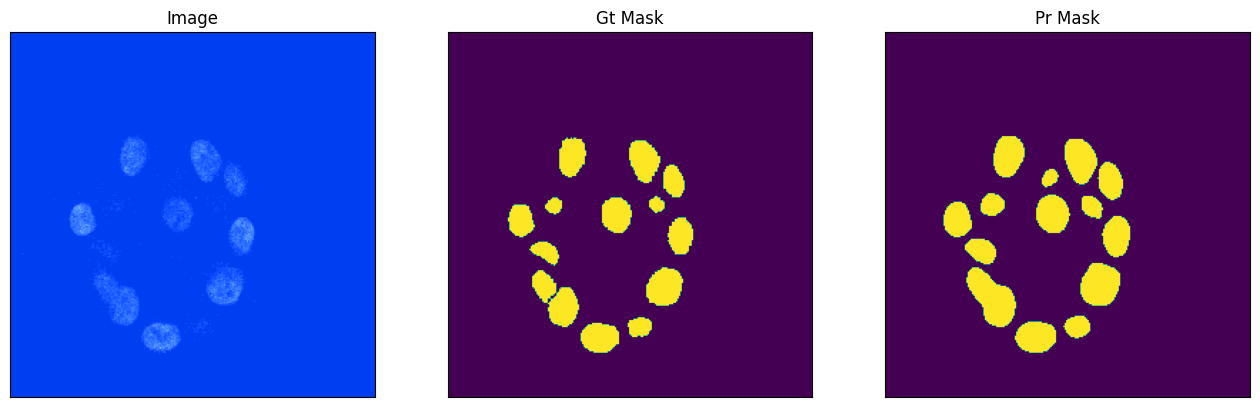

(1, 256, 256, 3)
(256, 256, 1)


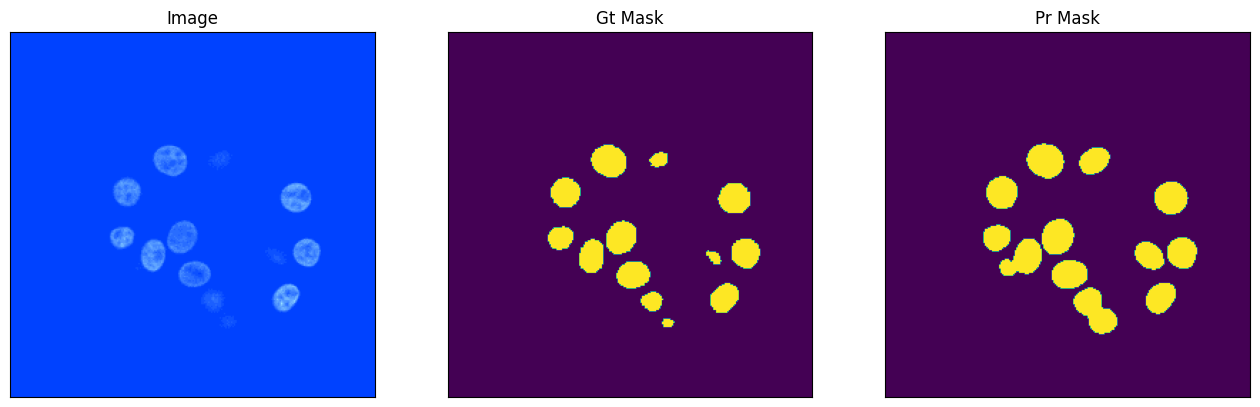

(1, 256, 256, 3)
(256, 256, 1)


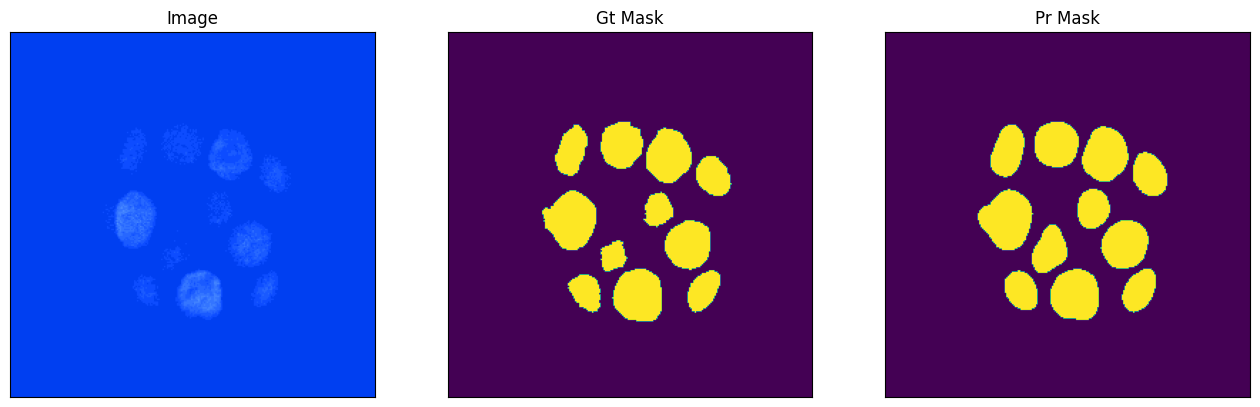

(1, 256, 256, 3)
(256, 256, 1)


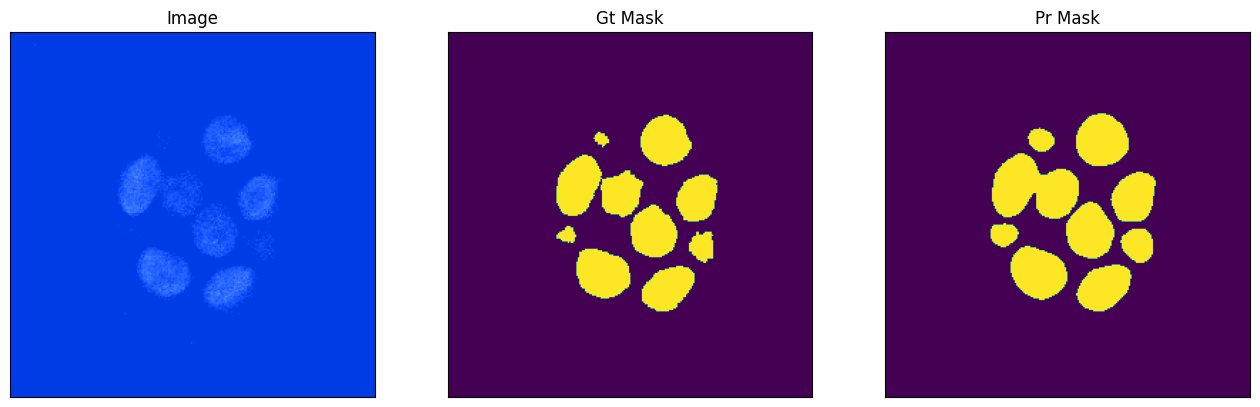

(1, 256, 256, 3)
(256, 256, 1)


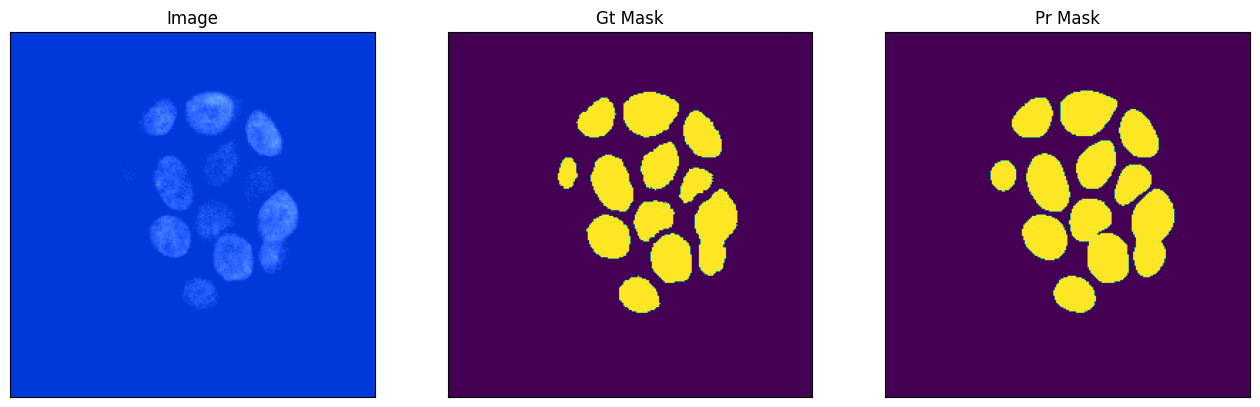

(1, 256, 256, 3)
(256, 256, 1)


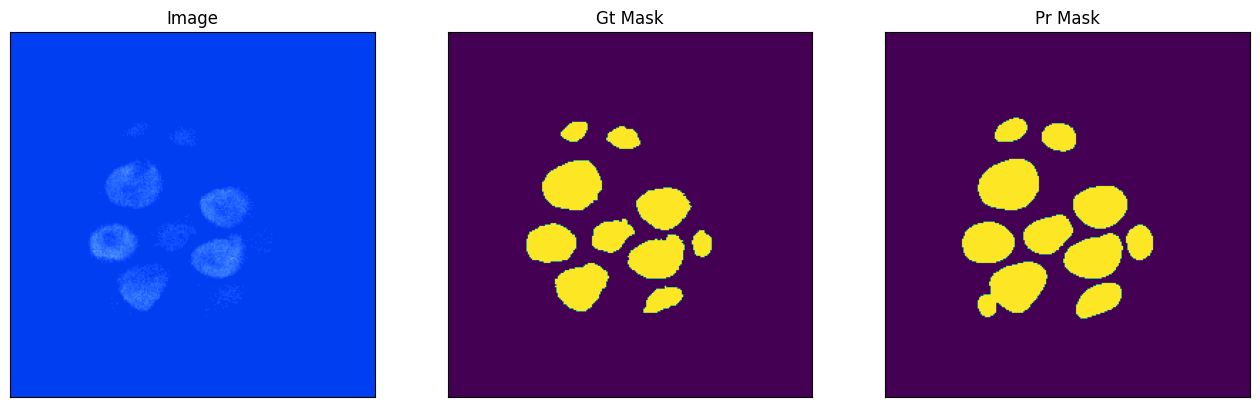

(1, 256, 256, 3)
(256, 256, 1)


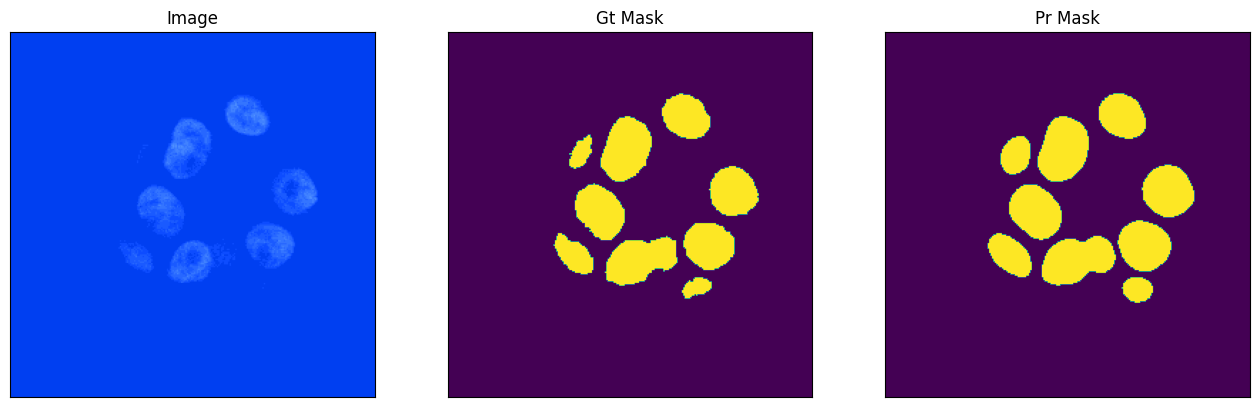

(1, 256, 256, 3)
(256, 256, 1)


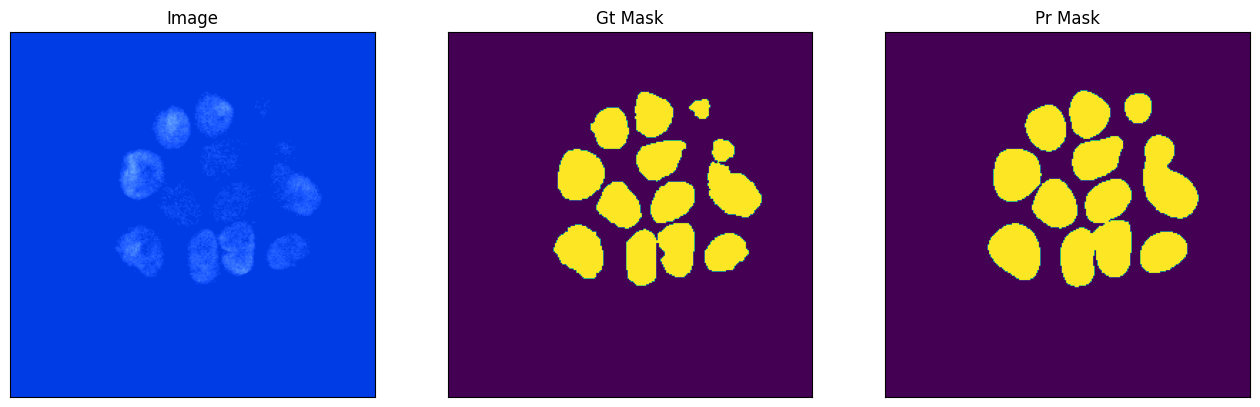

(1, 256, 256, 3)
(256, 256, 1)


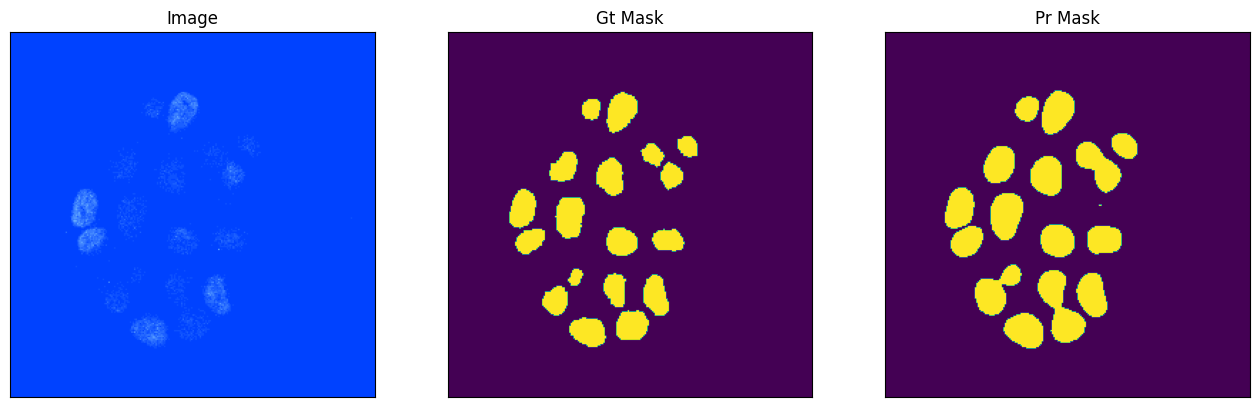

(1, 256, 256, 3)
(256, 256, 1)


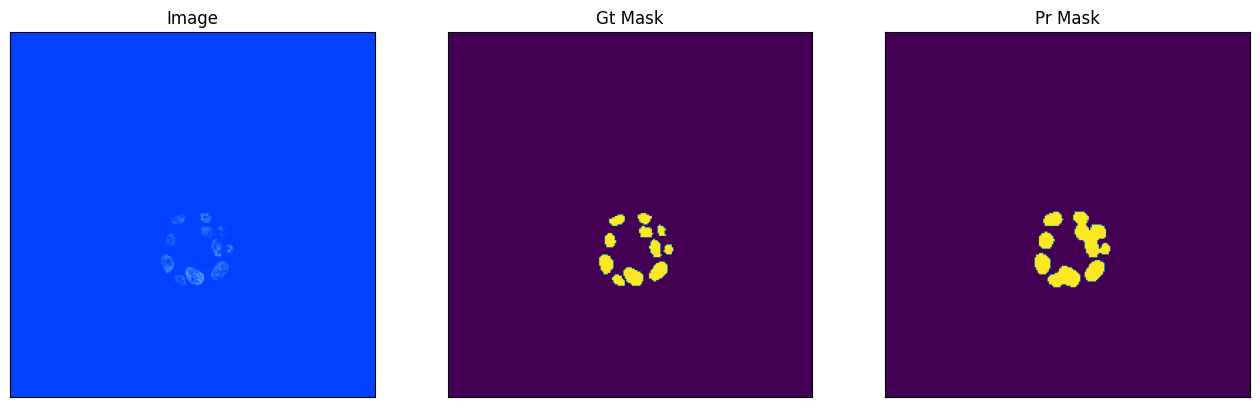

(1, 256, 256, 3)
(256, 256, 1)


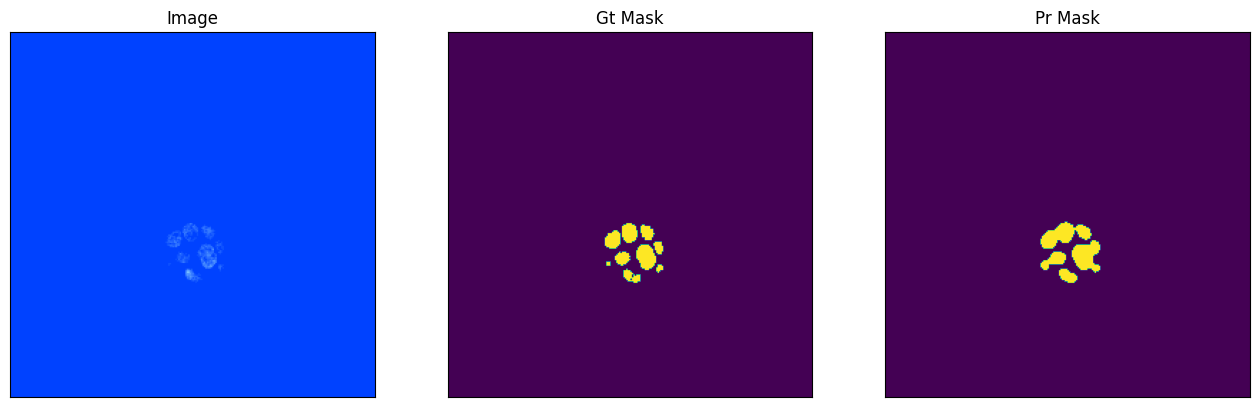

(1, 256, 256, 3)
(256, 256, 1)


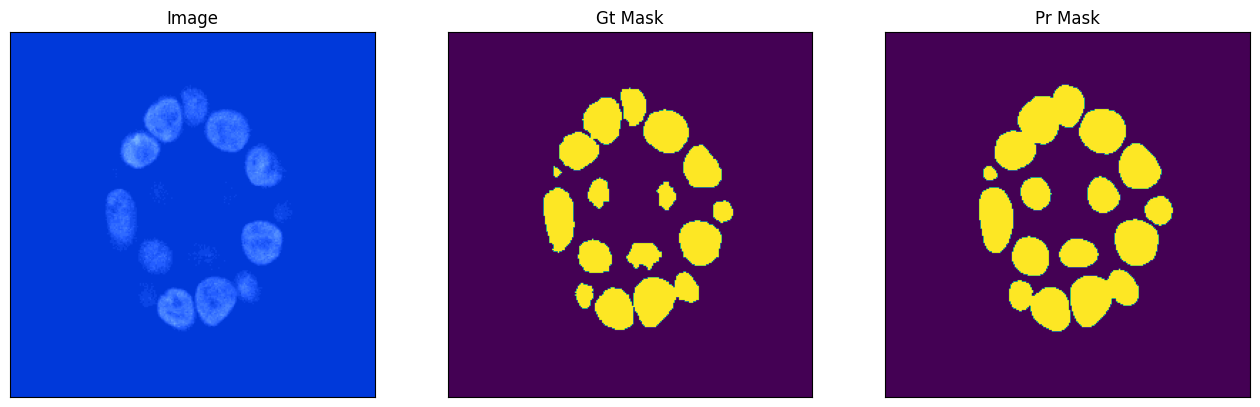

(1, 256, 256, 3)
(256, 256, 1)


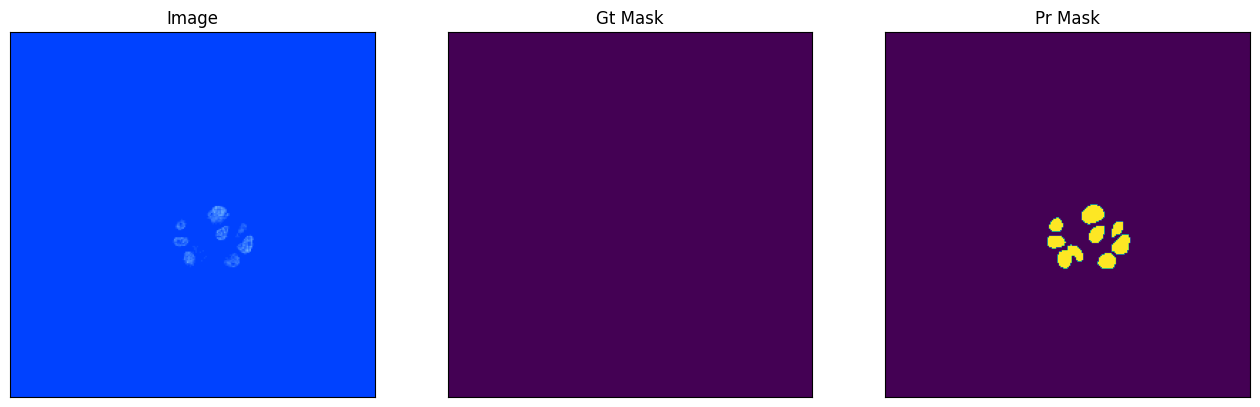

(1, 256, 256, 3)
(256, 256, 1)


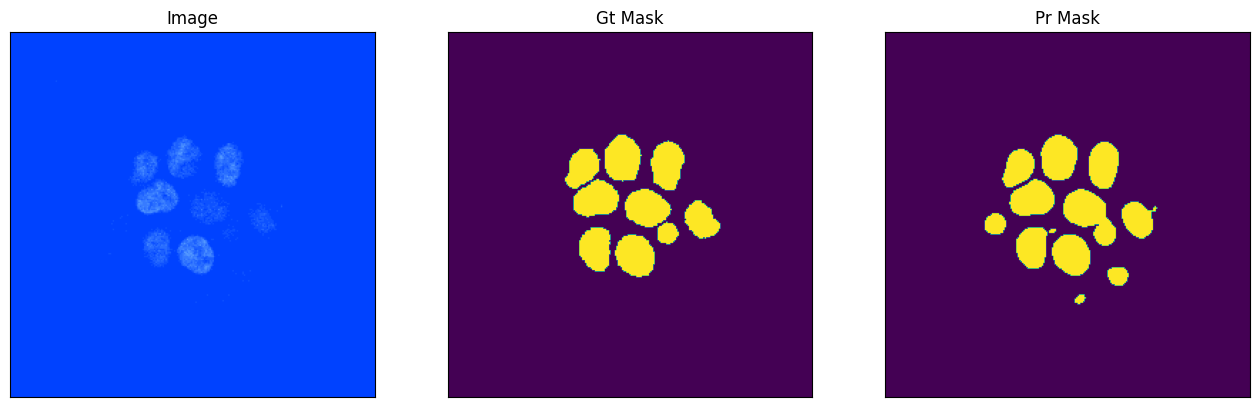

(1, 256, 256, 3)
(256, 256, 1)


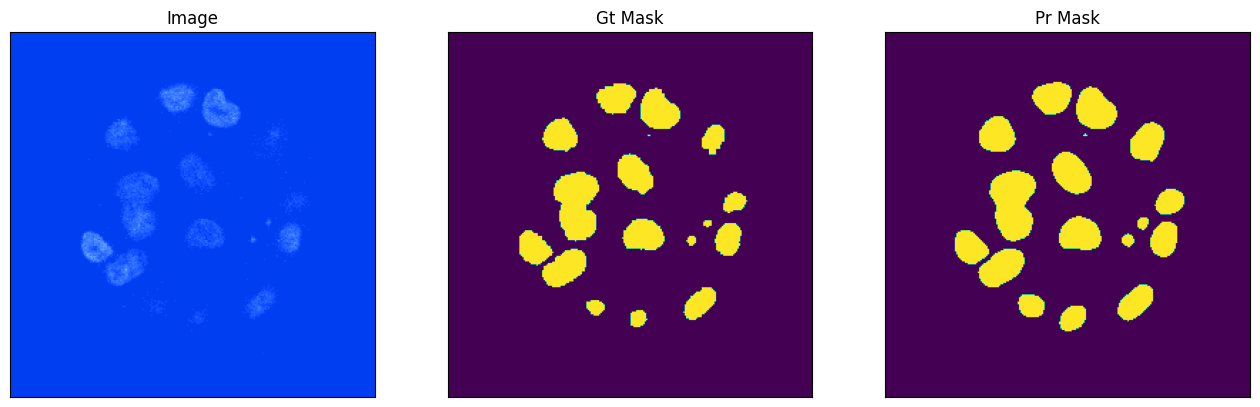

(1, 256, 256, 3)
(256, 256, 1)


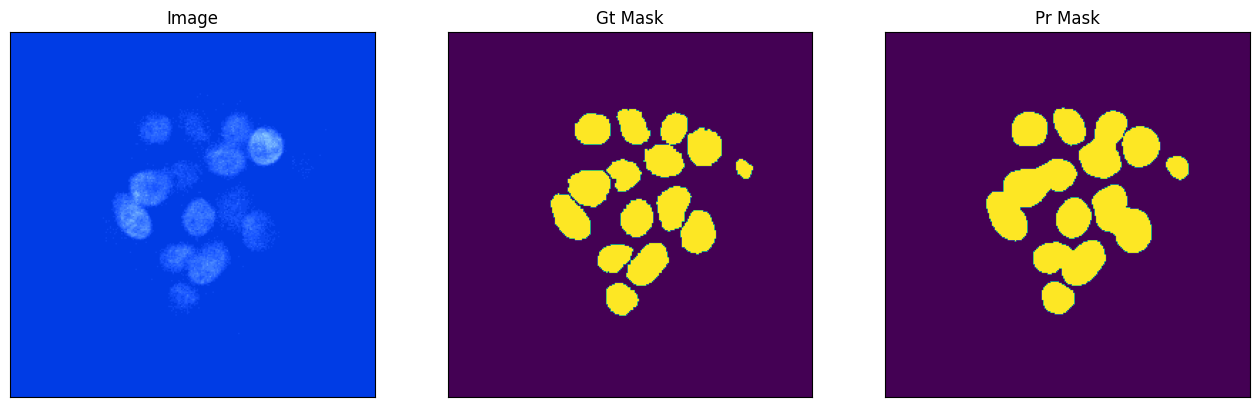

(1, 256, 256, 3)
(256, 256, 1)


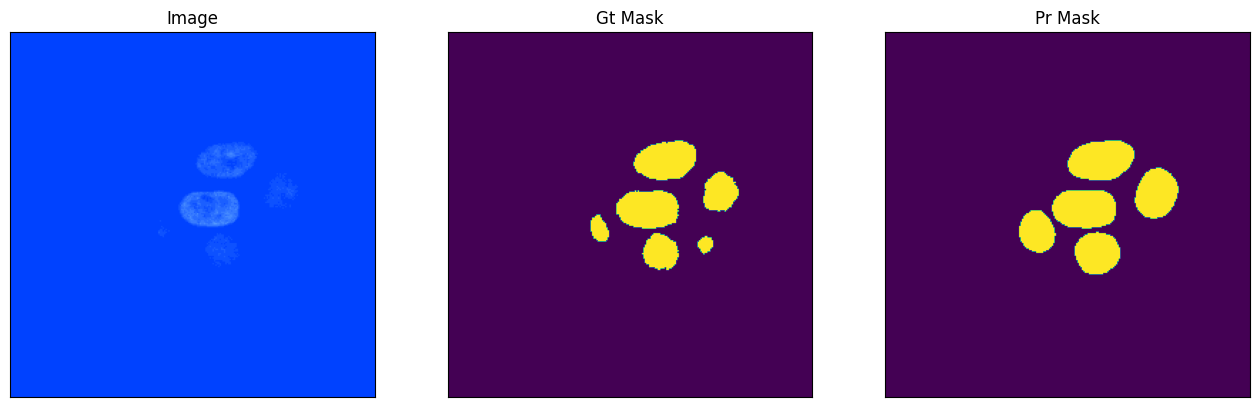

(1, 256, 256, 3)
(256, 256, 1)


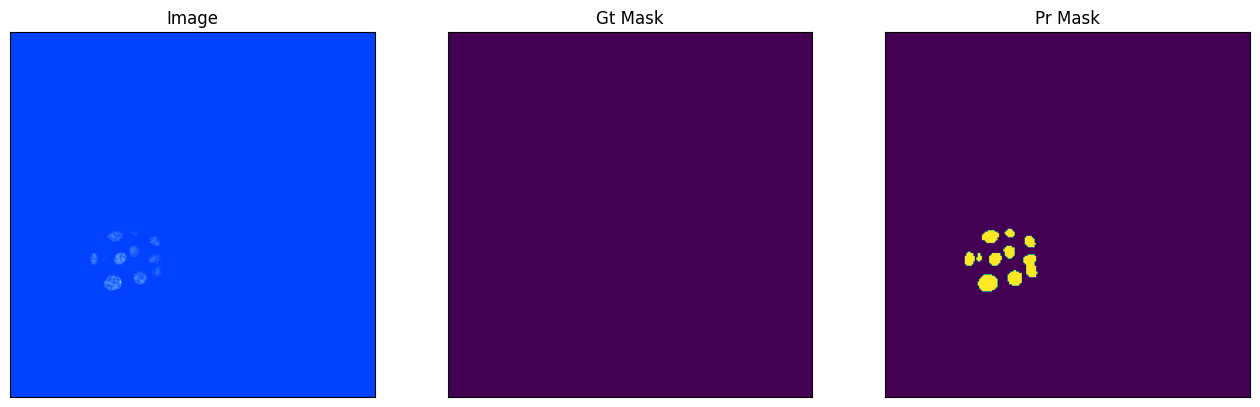

(1, 256, 256, 3)
(256, 256, 1)


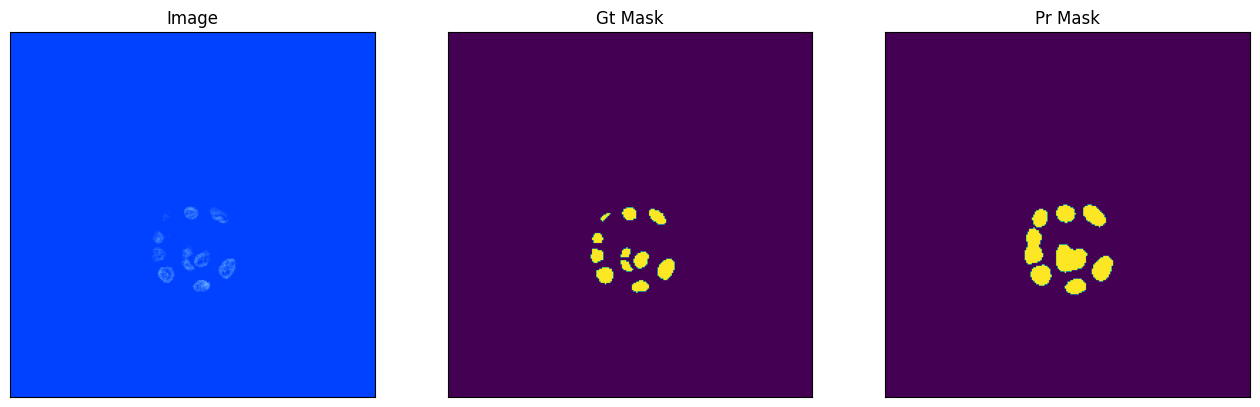

In [ ]:
n = 5
ids = np.random.choice(np.arange(len(test_dataset)), size=n)

for i in range(len(test_dataset)):

    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    print(image.shape)
    print(gt_mask.shape)
    pr_mask = model.predict(image).round()

    visualize(
        image=denormalize(image.squeeze()),
        gt_mask=gt_mask[..., 0].squeeze(),
        pr_mask=pr_mask[..., 0].squeeze(),
    )

In [ ]:
# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
specificity_scores = []
for i in range(len(test_dataset)):
   image, gt_mask = test_dataset[i]
   image = np.expand_dims(image, axis=0)
   print(image.shape)
   print(gt_mask.shape)
   pr_mask = model.predict(image).round()


   save_dir_pred = PATH + 'Predic-Results/pred_mask'
   if not os.path.exists(save_dir_pred): os.makedirs(save_dir_pred)

   # Save the predicted mask to your Google Drive directory
   output_im = Image.fromarray((np.squeeze(pr_mask) * 255).astype(np.uint8))
   output_im.save(os.path.join(save_dir_pred, f'pred_mask_{i}.png'))


   save_dir_img = PATH + 'Predic-Results/image'
   if not os.path.exists(save_dir_img): os.makedirs(save_dir_img)

   # Save the image to your Google Drive directory
   output_im = Image.fromarray((np.squeeze(image) * 255).astype(np.uint8))
   output_im.save(os.path.join(save_dir_img, f'image_{i}.png'))


   save_dir_gt = PATH + 'Predic-Results/ground-truth'
   if not os.path.exists(save_dir_gt): os.makedirs(save_dir_gt)

   # Save the gt_mask mask to your Google Drive directory
   output_im = Image.fromarray((np.squeeze(gt_mask) * 255).astype(np.uint8))
   output_im.save(os.path.join(save_dir_gt, f'gt_mask_{i}.png'))